In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import osmnx as ox
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points
from shapely import wkt
import itertools
sns.set()

%matplotlib inline

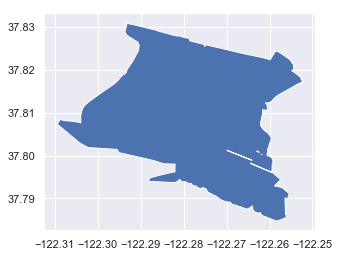

In [2]:
neighborhoods = gpd.read_file("ZillowNeighborhoods-CA/ZillowNeighborhoods-CA.shp")
oakland_neighborhoods = neighborhoods[neighborhoods.City == "Oakland"]

west = ['Clawson', 'Prescott', 'McClymonds', 'Hoover-Foster', 'Ralph Bunche', 
        'Oak Center', 'Acorn', 'Acorn Industrial', 'South Prescott']

downtown = ['Pill Hill', 'Oakland Ave-Harrison St', 'Northgate', 'Lakeside', 'Civic Center', 'Lakewide', 'Waverly',
           'Old City', 'Chinatown', 'Downtown', 'San Pablo Gateway', 'Produce & Waterfront', 'Peralta-Laney']

west_downtown = west + downtown
training_neighborhoods = oakland_neighborhoods[oakland_neighborhoods['Name'].isin(west_downtown)]
training_zone = training_neighborhoods.dissolve(by='City', aggfunc='sum')
training_bounds = training_zone.geometry.bounds
training_zone.plot()

In [3]:
oak_buildings = ox.buildings.buildings_from_polygon(training_zone.iloc[0 , 0])

In [13]:
oak_buildings.columns.values

array(['access', 'addr:city', 'addr:country', 'addr:county',
       'addr:housename', 'addr:housenumber', 'addr:postcode',
       'addr:state', 'addr:street', 'alt_name', 'alt_name1', 'alt_name2',
       'alt_name3', 'amenity', 'amenity_1', 'area', 'attribution',
       'build_start', 'building', 'building:height', 'building:levels',
       'building:part', 'caltrans:district', 'caltrans:type', 'capacity',
       'comment', 'comments', 'community_centre', 'community_centre:for',
       'company', 'contact:email', 'contact:phone', 'contact:website',
       'craft', 'created_by', 'cuisine', 'denomination', 'description',
       'diet:vegan', 'dispensing', 'disused:amenity', 'disused:name',
       'disused:shop', 'drink:beer', 'drink:wine', 'ele', 'fee', 'floors',
       'geometry', 'gnis:county_id', 'gnis:county_name', 'gnis:created',
       'gnis:feature_id', 'gnis:import_uuid', 'gnis:reviewed',
       'gnis:state_id', 'healthcare', 'height', 'highway', 'hist_name',
       'historic', '

In [64]:
oak_buildings['landuse'].dropna().unique()

array(['grass', 'industrial', 'commercial', 'construction'], dtype=object)

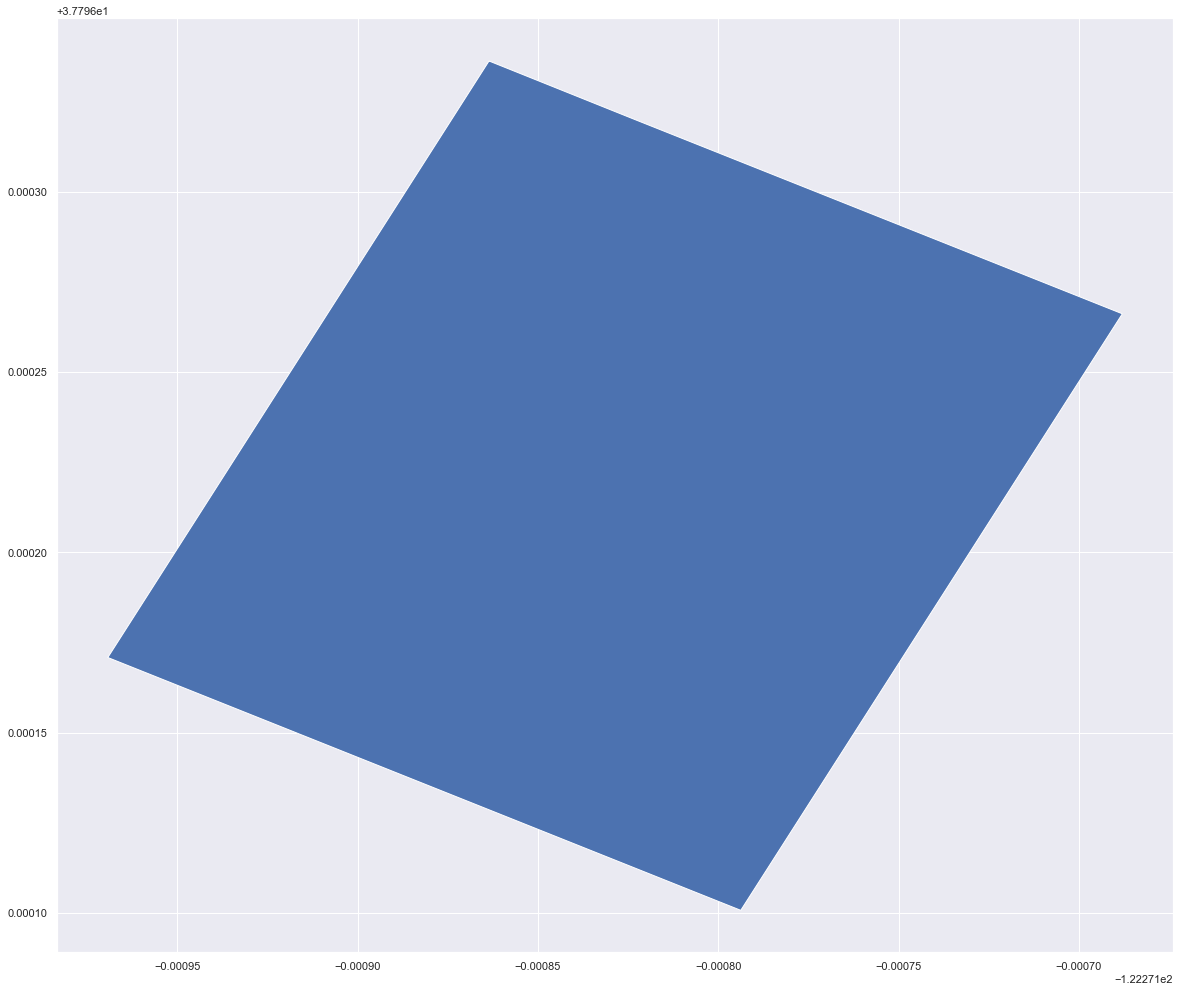

In [66]:
oak_buildings[oak_buildings['landuse'] == 'industrial'].plot(figsize=(20, 20))

In [68]:
oak_zones = gpd.read_file('Zoning/geo_export_71821546-6249-4fba-96d0-1790317fdc6c.shp')

In [75]:
oak_zones.basezone.unique()

array(['CIX-1', 'OS (NP)', 'RM-1', 'CIX-2', 'OS (AMP)', 'CN-4',
       'OS (RCA)', 'RM-3', 'RD-1', 'CN-3', 'RM-4', 'OS (CP)', 'M-40',
       'RD-2', 'CC-2', 'RM-2', 'CC-1', 'OS (SU)', 'RU-4', 'IG', 'RH-2',
       'S-15', 'CR-1', 'OS (AF)', 'RU-5', 'RU-3', 'RH-3', 'RU-2',
       'OS (LP)', 'CN-2', 'OS (PMP)', 'R-80', 'M-20', 'RH-4', 'C-45',
       'RH-1', 'S-1', 'CN-1', 'RU-1', 'C-40', 'M-30', 'CC-3', 'OS(LP)',
       'OS(NP)', 'OS (RSP)', 'OS(CP)', 'Wood Street', 'S-2', 'HBX-1',
       'D-KP-3', 'D-OTN', 'HBX-2', 'HBX-3', 'IO', 'CBD-P', 'CBD-X',
       'CBD-C', 'CBD-R', 'RU-3/D-BR', 'S-3', 'OS(PMP)', 'D-KP-1',
       'D-KP-2', 'K-DP-4'], dtype=object)

In [148]:
oak_zones['general_zone'] = oak_zones['basezone'].apply(lambda x: x.replace(' ', '-').split('-')[0])
oak_zones['general_zone'] = np.where(oak_zones['general_zone'].str.contains('OS'), 'open', oak_zones['general_zone'])
oak_zones['general_zone'] = np.where(oak_zones['general_zone'].str.contains('Wood'), 'RM', oak_zones['general_zone'])

In [149]:
print(oak_zones['general_zone'].unique())

['CIX' 'open' 'RM' 'CN' 'RD' 'M' 'CC' 'RU' 'IG' 'RH' 'S' 'CR' 'R' 'C'
 'HBX' 'D' 'IO' 'CBD' 'K']


In [150]:
residential = ['RM', 'RD', 'RU', 'RH', 'R']
commercial = ['CN', 'CC', 'S', 'CR', 'HBX', 'D', 'C', 'K']
urban = ['CBD']
industrial = ['CIX', 'IG', 'IO', 'M']

In [151]:
oak_zones['general_zone'] = oak_zones['general_zone'].replace(dict.fromkeys(residential, 'residential'))
oak_zones['general_zone'] = oak_zones['general_zone'].replace(dict.fromkeys(commercial, 'commercial'))
oak_zones['general_zone'] = oak_zones['general_zone'].replace(dict.fromkeys(urban, 'urban'))
oak_zones['general_zone'] = oak_zones['general_zone'].replace(dict.fromkeys(industrial, 'industrial'))

print(oak_zones['general_zone'].unique())

['industrial' 'open' 'residential' 'commercial' 'urban']


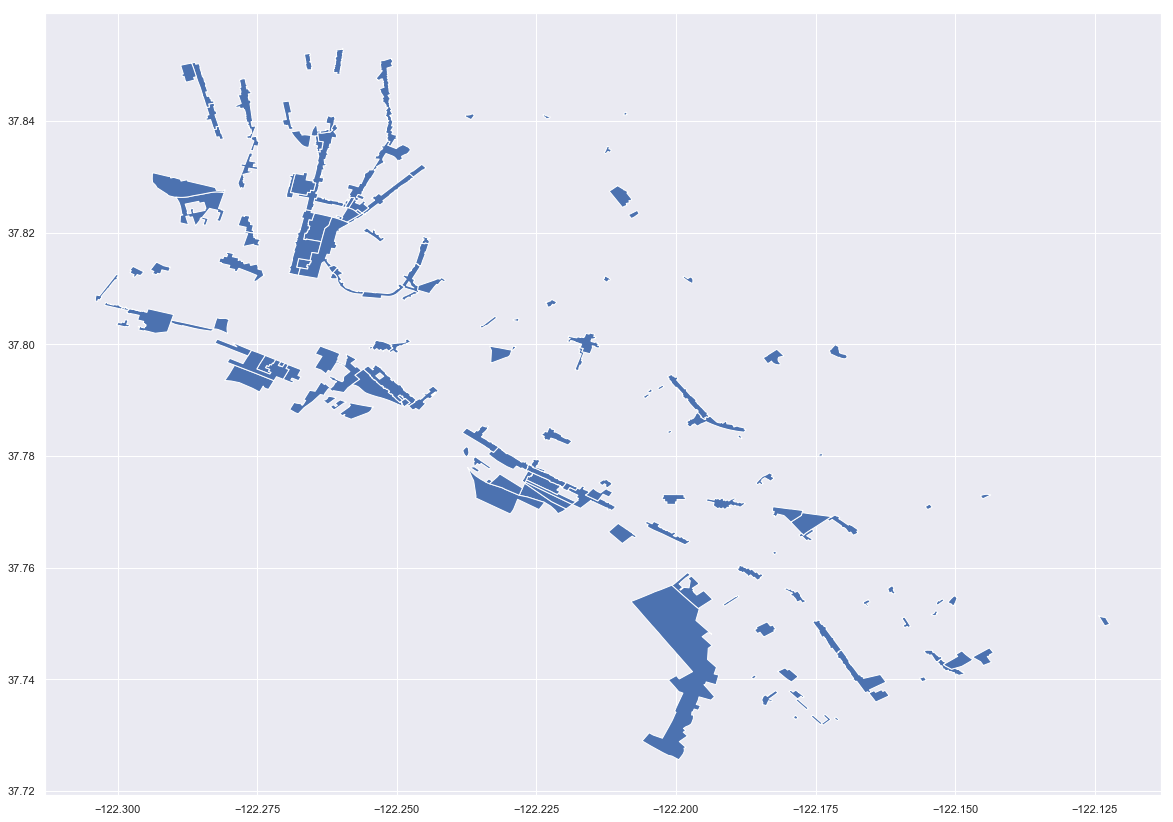

In [156]:
oak_zones[oak_zones['general_zone'] == 'commercial'].plot(figsize=(20,20))

In [2]:
import pickle